What is the mushroom?
In the biology, the mushroom is from a fungi kingdom, the term fungi is a reference for design taxons or a group of eukaryotic organisms. In that, we found the molds, yeasts and other types of mushroom growers.In this project we have the mission to see how we can classify fungi and how we can gather them together with all their characteristics.

¿Que son los hongos?
En la biología, los hongos vienen del reino fungi, el término fungi es una referencia para designar taxones o un grupo de organismos eucariotas. En este, nosotros encontramos los mohos, setas y otros tipos productores de setas. En este proyecto tenemos la misión de ver de que manera podemos clasificar los hongos y como podemos reunirlos ya reunicdas sus caracteristicas

In [38]:
#We load our libreries
#Cargamos nuestras librerías

import numpy as np
import pandas as pd
import io
from google.colab import files
from sklearn.model_selection import train_test_split

In [39]:
uploaded = files.upload()

Saving mushrooms.csv to mushrooms (1).csv


In [ ]:
dataframe = pd.read_csv(io.StringIO(uploaded['mushrooms.csv'].decode('utf-8')))

We will see the data set in general and then we will do EDA

In [ ]:
dataframe.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
dataframe.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          7488      3968              2388       4040    3148  

[4 rows x 23 columns]

In [ ]:
dataframe.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<BarContainer object of 23 artists>

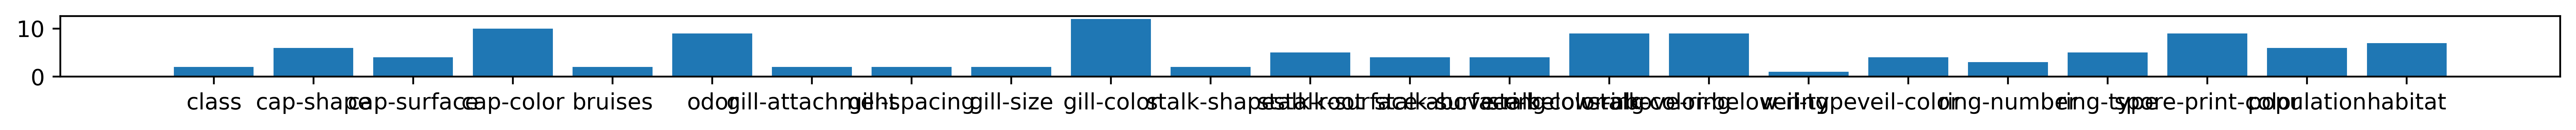

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,0.5),dpi=500)
plt.bar(dataframe.columns,dataframe.nunique())

##Correlation Matrix - Matriz de correlación

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in dataframe.columns:
    dataframe[i]=le.fit_transform(dataframe[i])
dataframe.head()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1  

[5 rows x 23 columns]

In [40]:
import seaborn as sns
plt.figure(figsize = (18,18), dpi = (500))
sns.heatmap(dataframe.corr(), annot = True)

We group the importance columns to later have the input and output columns

In [41]:
importance_col = ["bruises","gill-size","gill-color","ring-type","class"]
dataframe = dataframe[importance_col]
inputs  = dataframe.drop(columns=["class"])
outputs = dataframe["class"]
X,x,Y,y=train_test_split(inputs,outputs,test_size=0.1)
inputs.shape , outputs.shape

((8124, 4), (8124,))

##Create Model - Creación del modelo

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
parameters = {"n_neighbors" : [1,2,3,4,5,6,7]}
search = GridSearchCV(KNeighborsClassifier(),parameters)
search.fit(X,Y)
search.best_params_, search.best_score_

({'n_neighbors': 7}, 0.9281968445551136)

In [46]:
"Test :",search.score(x,y),"Train :",search.score(X,Y)

('Test :', 0.947109471094711, 'Train :', 0.9391328135685952)

##Evaluate -Evaluamos

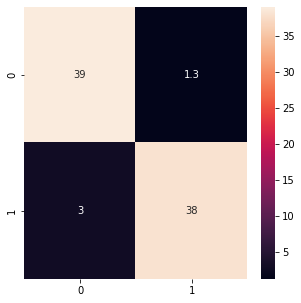

In [50]:
from sklearn.metrics import confusion_matrix
pred = search.predict(x)
plt.figure(figsize=(5,5))
cm = confusion_matrix(y,pred)/10
sns.heatmap(cm, annot= True)

Finally, we evaluate the accuracy of our model

Finalmente, nosotros evaluamos el rendimiento de nuestro modelo